## Ecommerce Purchases Data Analysis

The situation is, customers are providing some personal information while purchasing stuff on-line or in-store. For some reasons, your client wants to know the answer to some of his questions from the dataset, let's try to help for them.


The following insights are expected from this project:

1   How many entries your data have? Can you tell the no. of columns in your data?
    get the basic statistics of all the columns, count the unique data present in each feature
2.	Perform Univariate analysis and multi variate analysis using plots
3.	Check with the null values of the features and handle it appropriately
4.	Check for the normality of the data using histogram
5.	Perform imputation by checking the IQR and remove outliers if any
6.	What are the three most common customer's names?
7.	How many male customers have 'Structural Engineer' as profession?
8.	Any customers have the same phone number, can you find those customers?
9.	As a loyalty reward, company wants to send thanks coupon to those who spent 100CAD or more, please find out the customers?
10.	Can you tell the top 5 most popular email providers? (e.g. gmail.com, yahoo.com, etc...)
11	Is there any customer who is using email with "am.edu"?
12	Which day of the week, the store gets more customers?
13  What are two most common professions?


In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#1. Load data and display first 5 rows
cust = pd.read_csv('Cust_Purch_FakeData.csv')
cust.head(5)

,prefix,first,last,email,gender,age,company,profession,phone,postal,province,cc_no,cc_exp,cc_type,price(CAD),fav_color,ip,weekday,ampm,date
0,Dr.,Ray,Morton,sebvajom@kol.km,Male,38,Medtronic Inc.,Health Therapist,(987) 619-2695,B6V 3W3,MB,5.020000e+15,May-18,Solo,8.36,Blue,126.23.139.2,Sunday,pm,04-05-1930
1,Miss,Claudia,Rodriquez,acu@jatsot.ug,Female,51,"Ames Department Stores, Inc.",Health Therapist,(356) 736-7352,G7M 5F3,SK,5.020000e+15,Jul-28,Visa,68.31,Black,106.198.76.211,Tuesday,am,12/20/1926
2,Miss,Harry,Meyer,zuz@lo.wf,Female,51,CSX Corp.,Political Scientist,(539) 246-1806,A0Z 6P9,NS,6.300000e+15,Feb-23,Switch,34.65,Black,186.150.187.29,Wednesday,pm,08/20/1931
3,Miss,Edith,Gilbert,hansohsi@jupec.md,Female,55,Murphy Oil Corporation,Transportation Manager,(984) 962-7494,P9I 9H3,YT,3.530000e+15,Feb-28,Maestro,64.59,White,80.140.57.161,Saturday,am,06/18/2001
4,Dr.,Lura,Murphy,webediti@je.st,Female,20,PETsMART Inc,Statistician,(902) 568-9748,S1A 6K0,ON,4.030000e+15,Oct-25,Diners Club International,20.83,Yellow,211.103.43.41,Friday,pm,06/14/2045


In [3]:
# get number of rows, columns in the data
cust.shape

(30000, 20)

In [4]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   prefix      30000 non-null  object 
 1   first       30000 non-null  object 
 2   last        30000 non-null  object 
 3   email       30000 non-null  object 
 4   gender      29997 non-null  object 
 5   age         30000 non-null  int64  
 6   company     30000 non-null  object 
 7   profession  30000 non-null  object 
 8   phone       30000 non-null  object 
 9   postal      30000 non-null  object 
 10  province    29998 non-null  object 
 11  cc_no       30000 non-null  float64
 12  cc_exp      30000 non-null  object 
 13  cc_type     30000 non-null  object 
 14  price(CAD)  29995 non-null  object 
 15  fav_color   30000 non-null  object 
 16  ip          30000 non-null  object 
 17  weekday     30000 non-null  object 
 18  ampm        30000 non-null  object 
 19  date        30000 non-nul

In [5]:
cust['cc_no']=str(cust['cc_no'])
cust['cc_no'].dtype

dtype('O')

In [6]:
#basic statistics and count of unique numerial columns
cust.describe()

,age
count,30000.000000
mean,41.550067
std,13.839073
min,18.000000
25%,30.000000
50%,42.000000
75%,53.000000
max,65.000000


In [7]:
#basic statistics of object columns and count the unique data present in each feature

cust.describe(include=['object'])

,prefix,first,last,email,gender,company,profession,phone,postal,province,cc_no,cc_exp,cc_type,price(CAD),fav_color,ip,weekday,ampm,date
count,30000,30000,30000,30000,29997,30000,30000,30000,30000,29998,30000,30000,30000,29995,30000,30000,30000,30000,30000
unique,4,497,500,28955,3,947,389,29999,29960,14,1,130,17,9512,6,29999,7,2,23789
top,Mrs.,Willie,Byrd,me@outlook.com,Female,Trinity Industries Inc,Preschool Teacher,(263) 382-8004,J2Y 9J9,ON,0 5.020000e+15\n1 5.020000e+15\n...,Apr-18,Solo,83.21,White,64.136.159.51,Saturday,am,01-01-2063
freq,7676,130,94,8,15143,51,112,2,2,2372,30000,293,1867,13,5080,2,4376,15031,5


In [8]:
#2. Check with the null values 
cust.isnull().sum()

prefix        0
first         0
last          0
email         0
gender        3
age           0
company       0
profession    0
phone         0
postal        0
province      2
cc_no         0
cc_exp        0
cc_type       0
price(CAD)    5
fav_color     0
ip            0
weekday       0
ampm          0
date          0
dtype: int64

In [9]:
#addressing the null values in gender column
cust['gender'] = cust['gender'].fillna(cust['gender'].mode()[0])
cust.isnull().sum()

prefix        0
first         0
last          0
email         0
gender        0
age           0
company       0
profession    0
phone         0
postal        0
province      2
cc_no         0
cc_exp        0
cc_type       0
price(CAD)    5
fav_color     0
ip            0
weekday       0
ampm          0
date          0
dtype: int64

In [10]:
#addressing the null values in price(CAD) column
cust=cust.rename(columns={cust.columns[14]: 'price_CAD'})
cust.head(5)

,prefix,first,last,email,gender,age,company,profession,phone,postal,province,cc_no,cc_exp,cc_type,price_CAD,fav_color,ip,weekday,ampm,date
0,Dr.,Ray,Morton,sebvajom@kol.km,Male,38,Medtronic Inc.,Health Therapist,(987) 619-2695,B6V 3W3,MB,0 5.020000e+15\n1 5.020000e+15\n...,May-18,Solo,8.36,Blue,126.23.139.2,Sunday,pm,04-05-1930
1,Miss,Claudia,Rodriquez,acu@jatsot.ug,Female,51,"Ames Department Stores, Inc.",Health Therapist,(356) 736-7352,G7M 5F3,SK,0 5.020000e+15\n1 5.020000e+15\n...,Jul-28,Visa,68.31,Black,106.198.76.211,Tuesday,am,12/20/1926
2,Miss,Harry,Meyer,zuz@lo.wf,Female,51,CSX Corp.,Political Scientist,(539) 246-1806,A0Z 6P9,NS,0 5.020000e+15\n1 5.020000e+15\n...,Feb-23,Switch,34.65,Black,186.150.187.29,Wednesday,pm,08/20/1931
3,Miss,Edith,Gilbert,hansohsi@jupec.md,Female,55,Murphy Oil Corporation,Transportation Manager,(984) 962-7494,P9I 9H3,YT,0 5.020000e+15\n1 5.020000e+15\n...,Feb-28,Maestro,64.59,White,80.140.57.161,Saturday,am,06/18/2001
4,Dr.,Lura,Murphy,webediti@je.st,Female,20,PETsMART Inc,Statistician,(902) 568-9748,S1A 6K0,ON,0 5.020000e+15\n1 5.020000e+15\n...,Oct-25,Diners Club International,20.83,Yellow,211.103.43.41,Friday,pm,06/14/2045


In [11]:
#addressing the null values in price(CAD) column
cust['price_CAD'] = pd.to_numeric(cust['price_CAD'], errors='coerce')

In [12]:
#addressing the null values in price(CAD) column

cust['price_CAD'] = cust['price_CAD'].fillna(cust['price_CAD'].mean())
cust.isnull().sum()

prefix        0
first         0
last          0
email         0
gender        0
age           0
company       0
profession    0
phone         0
postal        0
province      2
cc_no         0
cc_exp        0
cc_type       0
price_CAD     0
fav_color     0
ip            0
weekday       0
ampm          0
date          0
dtype: int64

In [13]:
#addressing the null values in province column
cust['province'] = cust['province'].fillna(cust['province'].mode()[0])
cust.isnull().sum()

prefix        0
first         0
last          0
email         0
gender        0
age           0
company       0
profession    0
phone         0
postal        0
province      0
cc_no         0
cc_exp        0
cc_type       0
price_CAD     0
fav_color     0
ip            0
weekday       0
ampm          0
date          0
dtype: int64

In [14]:
#3. Univariate analysis and multi variate analysis 
print('Skewness:',cust.skew())
print('*'*60)
print('Kurtosis:',cust.kurt())
print('*'*60)

Skewness: age         -0.007923
price_CAD   -0.004288
dtype: float64
************************************************************
Kurtosis: age         -1.203635
price_CAD   -1.192639
dtype: float64
************************************************************


(array([7424.,    0.,    0., 7440.,    0.,    0., 7676.,    0.,    0.,
        7460.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

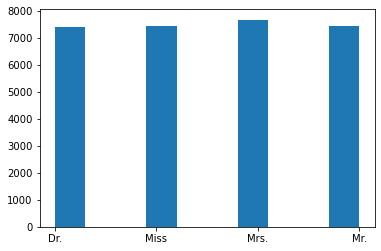

In [15]:
#sns.distplot(cust.gender)
plt.hist(cust['prefix'])

([<matplotlib.patches.Wedge at 0x199d01457c0>,
 [Text(-0.5579613394977995, 0.9479868900073574, 'Blue'),
  Text(-1.0997237951510719, -0.02464902388581245, 'Black'),
  Text(-0.5192981205754462, -0.969705863634334, 'White'),
  Text(0.5821946688564804, -0.9333002558421878, 'Yellow'),
  Text(1.0995169834705363, 0.032594524998115944, 'Red'),
  Text(0.5371817581364005, 0.9599144538579915, 'Green')],
 [Text(-0.30434254881698153, 0.5170837581858313, '16.933'),
  Text(-0.5998493428096755, -0.013444922119534063, '16.847'),
  Text(-0.28325352031387974, -0.528930471073273, '16.790'),
  Text(0.3175607284671711, -0.5090728668230114, '16.613'),
  Text(0.5997365364384742, 0.01777883181715415, '16.577'),
  Text(0.29300823171076384, 0.523589702104359, '16.240')])

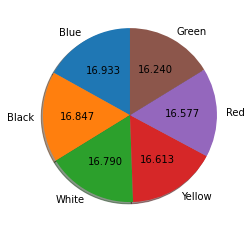

In [16]:
plt.pie(cust['fav_color'].value_counts(),startangle=90,autopct='%.3f',labels=['Blue','Black','White','Yellow','Red','Green'],shadow=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_CAD', ylabel='Density'>

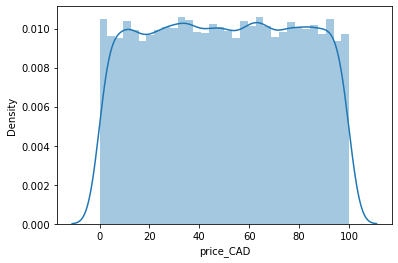

In [17]:
sns.distplot(cust.price_CAD)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

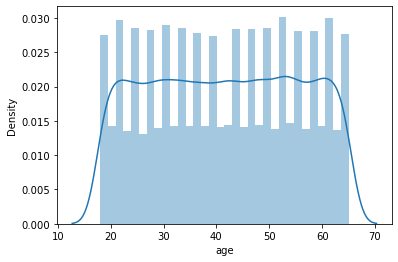

In [18]:
sns.distplot(cust.age)

In [19]:
cust.groupby('prefix')["fav_color"].value_counts().unstack()

fav_color,Black,Blue,Green,Red,White,Yellow
prefix,,,,,,
Dr.,1291,1138,1277,1222,1295,1201
Miss,1169,1317,1182,1266,1276,1230
Mr.,1202,1284,1242,1251,1263,1218
Mrs.,1322,1298,1272,1315,1246,1223


<AxesSubplot:xlabel='weekday', ylabel='price_CAD'>

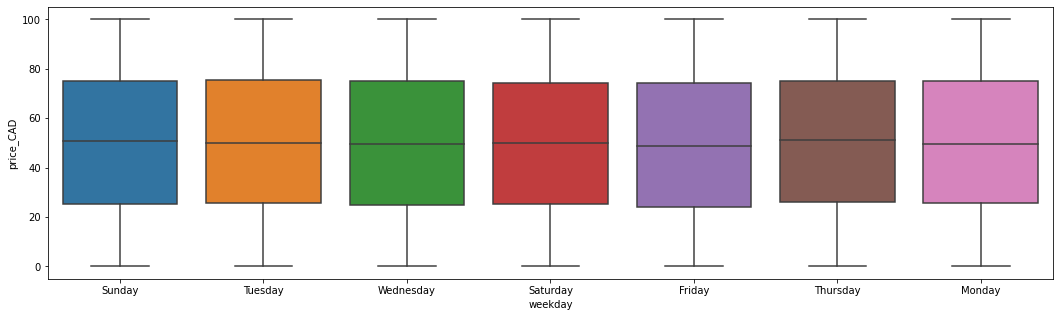

In [20]:
plt.figure(figsize=(18,5))
sns.boxplot(x = "weekday", y = "price_CAD", data=cust)

<AxesSubplot:xlabel='prefix', ylabel='age'>

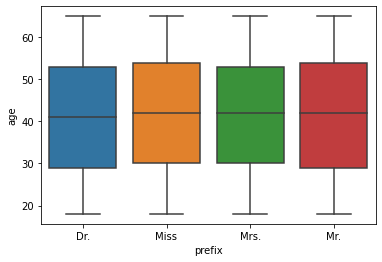

In [21]:
sns.boxplot(x = "prefix", y = "age", data=cust)

Text(0, 0.5, 'No. of customers')

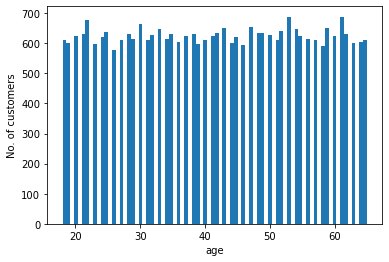

In [23]:
#4.Check for the normality of the data using histogram
plt.hist(cust.age, bins = 80)
plt.xlabel("age")
plt.ylabel("No. of customers")
#The histogram of age does not suggest a normal distribution。

Text(0.5, 0, 'price')

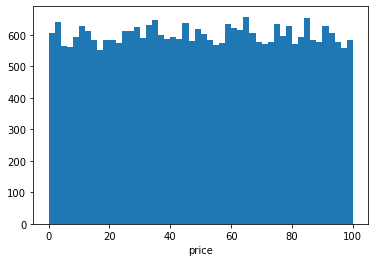

In [24]:
plt.hist(cust.price_CAD, bins = 50)
plt.xlabel("price")
#The histogram of price does not suggest a normal distribution。

In [34]:
#5. Perform imputation by checking the IQR and remove outliers if any
#Check age
Q3 = np.percentile(cust.age,75)
Q1 = np.percentile(cust.age,25)
IQR = Q3 - Q1
outliers = cust.age[(Q1 - 1.5*IQR >= cust.age) |  (cust.age >= Q3 + 1.5*IQR)]
outliers

Series([], Name: age, dtype: int64)

In [35]:
#Check price
Q3 = np.percentile(cust.price_CAD,75)
Q1 = np.percentile(cust.price_CAD,25)
IQR = Q3 - Q1
outliers = cust.price_CAD[(Q1 - 1.5*IQR >= cust.price_CAD) |  (cust.price_CAD >= Q3 + 1.5*IQR)]
outliers
#There are no outliers

Series([], Name: price_CAD, dtype: float64)

In [36]:
#6. What are the three most common customer's names?
cust['first'].value_counts().head(n=3)
#the three most common customer's names are Willie, Francis and Eula

Willie     130
Francis    124
Eula        86
Name: first, dtype: int64

In [37]:
#7. How many male customers have 'Structural Engineer' as profession?
cust[(cust['profession'] == 'Structural Engineer')
     & (cust['gender'] == 'Male')].count()
#There are 43 male customers are Structural Engineer.

prefix        43
first         43
last          43
email         43
gender        43
age           43
company       43
profession    43
phone         43
postal        43
province      43
cc_no         43
cc_exp        43
cc_type       43
price_CAD     43
fav_color     43
ip            43
weekday       43
ampm          43
date          43
dtype: int64

In [38]:
#8. Any customers have the same phone number, can you find those customers?
cust['phone'].value_counts().head(n=3)

(263) 382-8004    2
(378) 956-8236    1
(458) 999-8675    1
Name: phone, dtype: int64

In [39]:
cust[cust['phone'] == '(263) 382-8004']

,prefix,first,last,email,gender,age,company,profession,phone,postal,province,cc_no,cc_exp,cc_type,price_CAD,fav_color,ip,weekday,ampm,date
15,Mrs.,Lilly,Tyler,kofadu@itohi.tf,Female,38,CSX Corp.,Structural Engineer,(263) 382-8004,V7K 1E3,ON,0 5.020000e+15\n1 5.020000e+15\n...,Nov-22,Diners Club Carte Blanche,9.61,Yellow,74.124.37.227,Saturday,am,03/30/1985
16,Mrs.,Peter,Cain,megkosig@anazeor.gn,Male,27,Campbell Soup Co.,Insurance Adjuster,(263) 382-8004,E8T 2B4,YT,0 5.020000e+15\n1 5.020000e+15\n...,Mar-24,Solo,13.74,Black,25.207.141.135,Tuesday,am,08-05-1950


In [40]:
#9. Customers who spent 100CAD or more.
cust[cust['price_CAD'] >= 100.0]

,prefix,first,last,email,gender,age,company,profession,phone,postal,province,cc_no,cc_exp,cc_type,price_CAD,fav_color,ip,weekday,ampm,date
21093,Mrs.,Cody,Christensen,get@jovu.ag,Male,28,National City Corp.,Hospital Administrator,(261) 737-3292,X0S 1O5,PE,0 5.020000e+15\n1 5.020000e+15\n...,Mar-24,JCB,100.0,Green,168.48.19.165,Wednesday,pm,03/28/1955
24385,Miss,Lizzie,Dixon,goh@tuwjaz.gd,Female,38,FleetBoston Financial Co.,Compensation Analyst,(989) 239-1752,V8X 9V6,NB,0 5.020000e+15\n1 5.020000e+15\n...,Jul-19,Bankcard,100.0,Blue,140.87.99.78,Saturday,pm,03-03-1983


In [41]:
#10. The top 5 most popular email providers
cust['email'].apply(lambda x: x.split('@')[1]).value_counts().head()

gmail.com      1687
me.com         1676
outlook.com    1664
live.com       1660
hotmail.com    1659
Name: email, dtype: int64

In [42]:
#Is there any customer who is using email with "am.edu"?
cust[cust['email'].apply(lambda x: x.split('@')[1]) == 'am.edu']

,prefix,first,last,email,gender,age,company,profession,phone,postal,province,cc_no,cc_exp,cc_type,price_CAD,fav_color,ip,weekday,ampm,date
150,Miss,Loretta,Fletcher,barit@am.edu,Female,48,York International Corp,Rehabilitation Counselor,(323) 279-8038,E5X 8L0,QC,0 5.020000e+15\n1 5.020000e+15\n...,May-21,Diners Club United States & Canada,97.26,White,147.57.240.225,Monday,am,11-07-2066


In [43]:
#Which day of the week, the store gets more customers?
cust['weekday'].value_counts().head(1)
# The store gets more customers on Saturday.

Saturday    4376
Name: weekday, dtype: int64

In [44]:
#What are two most common professions?
cust['profession'].value_counts().head(n = 2)

Preschool Teacher       112
Distribution Manager    107
Name: profession, dtype: int64